<a href="https://colab.research.google.com/github/duvanherfi/proyecto_metodos_numericos/blob/main/Proyecto_Metodos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**********************************************
[[5.00000000e-01 3.75000000e-01 3.43750000e-01 3.35937500e-01
  3.33984375e-01 3.33496094e-01 3.33374023e-01 3.33343506e-01
  3.33335876e-01 1.00000000e+00]
 [3.36364701e-01 3.09335085e-01 2.68176694e-01 2.21332545e-01
  2.06862085e-01 2.03042717e-01 2.04098736e-01 2.11936987e-01
  2.39657888e-01 2.39657888e-01]
 [2.07502566e-01 2.05306924e-01 1.44985006e-01 9.15793878e-02
  7.46103683e-02 6.94132713e-02 6.83780019e-02 1.00924805e-01
  1.23384233e-01 1.23384233e-01]
 [1.15651864e-01 1.20670994e-01 7.90334752e-02 4.26532158e-02
  2.93158960e-02 2.46822918e-02 2.32650734e-02 3.10474697e-02
  5.14772341e-02 5.14772341e-02]
 [6.04067416e-02 6.58651329e-02 4.23676989e-02 2.12552287e-02
  1.26427812e-02 9.33126825e-03 8.14908542e-03 9.79913878e-03
  2.04254576e-02 2.04254576e-02]
 [3.03412276e-02 3.43281120e-02 2.21627035e-02 1.08544830e-02
  5.87431605e-03 3.80139608e-03 2.98762037e-03 3.19668979e-03
  7.87404914e-03 7.87404914e-03]
 [1.4808691

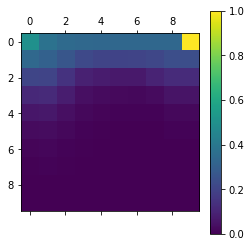

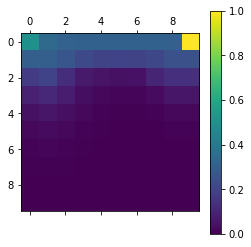

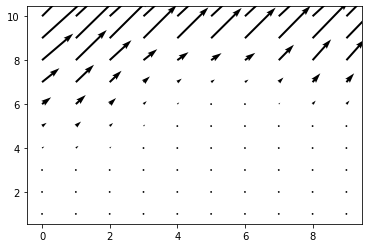

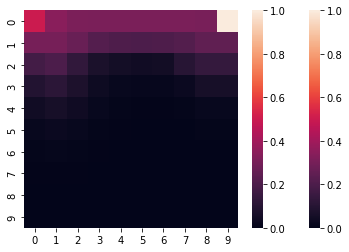

In [74]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb

global vx, vy, p, tx, ty, v0, viga_iniciox, viga_finalx
v0 = 1
tx = 10
ty = 10
viga_iniciox = 3
viga_finalx = 7
viga_finaly = 3

vx = np.zeros((tx, ty))
vy = np.zeros((tx, ty))

p = np.zeros((tx, ty))
#############################################################################
def r(v1,v2, p, i, j, h):
  vi1j=v1[i+1][j]
  vi2j=v1[i-1][j]
  vij1=v1[i][j+1]
  vij2=v1[i][j-1]
  vxij = v1[i][j]
  vyij = v2[i][j]
  pi1j = p[i+1][j] if i+1 < len(p) else 0
  pi2j = p[i-1][j] if i+1 < len(p) else 0
  sumavx = vi1j+vi2j+vij1+vij2
  restavx = vi1j-vi2j
  primer_operando = (sumavx)-(h/2)*vxij*(restavx)-(h/2)*vyij*(restavx)
  segundo_operando = (h/2)*(pi1j-pi2j)
  return ((1/4)*(primer_operando-segundo_operando)-vxij)
##############################################################################
def iter_in_vx(w, r, h, iter):
  for iteracion in range(0,iter):
    fronteras_x(h)
    for i in range(0, tx-1):
      for j in range(0, ty-1):
        vxji = vx[j][i]
        valor_r = r(vx, vy, p, j, i, h)
        wrji = w*valor_r
        vx[j][i] = vxji+wrji
      #print(vx)

def iter_in_vy(w, r, h, iter):
  for iteracion in range(0,iter):
    
    fronteras_y(h)
    for i in range(0, tx-1):
      for j in range(0, ty-1):
        vxji = vy[j][i]
        valor_r = r(vy, vx, p, j, i, h)
        wrji = w*valor_r
        vy[j][i] = vxji+wrji
      #print(vx)
###############################################################
def fronteras_x(h):
  ## inlet F
  for j in range(ty):
    vx[j][0] = vx[j][1]
  
  ## outlet
  for j in range(ty):
    vx[j][tx-1]=vx[j][tx-2]

  ## surface
  for i in range(tx):
    vx[0][i]=v0

  ## base E
  for i in range(viga_iniciox-1):
    vx[ty-1][i]=0

  ## base A
  for i in range(viga_finalx+2, tx):
    vx[ty-1][i] = 0

  ## viga
  for j in range(viga_finaly, ty):
    for i in range(viga_iniciox, viga_finalx+1):
      vx[j][i]=0

  ## viga frente
  for i in range(viga_finaly, ty):
    vx[i][viga_finalx-1]=0

  ## viga arriba
  for i in range(viga_iniciox, viga_finalx+1):
    vx[viga_finaly-1][i]=0

  ## viga atrás
  for j in range(viga_finaly, ty):
    vx[j][viga_finalx+1]=0
#############################################################
def fronteras_y(h):
  ## inlet F
  for j in range(ty):
    vy[j][0] = 0
    
  ## outlet
  for j in range(ty):
    vy[j][tx-1]=vy[j][tx-2]

  ## surface
  for i in range(tx):
    vy[0][i]=v0

  ## base E
  for i in range(viga_iniciox-1):
    vy[ty-1][i]=0

  ## base A
  for i in range(viga_finalx+2, tx):
    vy[ty-1][i] = 0

  ## viga
  for j in range(viga_finaly, ty):
    for i in range(viga_iniciox, viga_finalx+1):
      vy[j][i]=0

  ## viga frente
  for i in range(viga_finaly, ty):
    vy[j][viga_iniciox-1]=(-2 * (vx[j][viga_iniciox-2]-vx[j][viga_iniciox-1]))/(h**2)

  ## viga arriba
  for i in range(viga_iniciox, viga_finalx+1):
    vy[viga_finaly-1][i]=(-2 * (vx[viga_finaly-2][i]-vx[viga_finaly-1][i]))/(h**2)

  ## viga atrás
  for j in range(viga_finaly, ty):
    vy[j][viga_finalx+1]=(-2 * (vx[j][viga_finalx+2]-vx[j][viga_finalx+1]))/(h**2)
############################################################################
def mostrar(matriz):
  dataframe = pd.DataFrame(matriz)
  plt.matshow(dataframe)
  plt.colorbar()
####################################################################
iter_in_vx(1, r, 2, 2000)
iter_in_vy(1, r, 2, 2000)
###graficas
print("**********************************************")
print(vx)
print(vy)
print("************************************************")
mostrar(vx)
mostrar(vy)
x=np.zeros_like(vx)
y=np.zeros_like(vy)

for j in range(ty):
  for i in range(tx):
    x[j][i] = i
    y[j][i] = ty - j

plt.figure()
plt.quiver(x, y, vx, vy)
plt.show()

sb.heatmap(vx)
sb.heatmap(vy)